### Fase 1 – Imports e Configurações

Nesta fase importamos as bibliotecas necessárias para manipulação de dados e visualização.

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais para gráficos
plt.rcParams["figure.figsize"] = (8,5)
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

### Fase 2 – Carregar os dados

Aqui carregamos a base `crop_yield.csv` e verificamos suas dimensões e primeiras linhas.

In [118]:
# Carregar dataset
df = pd.read_csv("../data/crop_yield.csv")

# Primeiras linhas e dimensão
display(df.head())
print("Dimensão:", df.shape)

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


Dimensão: (156, 6)


### Fase 3 – Renomear colunas

Os nomes das colunas foram padronizados para facilitar a manipulação no Python.

In [119]:
rename_map = {
    "Crop": "cultura",
    "Precipitation (mm day-1)": "precipitacao_mm_dia",
    "Specific Humidity at 2 Meters (g/kg)": "umidade_especifica_gkg",
    "Relative Humidity at 2 Meters (%)": "umidade_relativa_pct",
    "Temperature at 2 Meters (C)": "temperatura_2m_c",
    "Yield": "rendimento_t_ha"
}
df.rename(columns=rename_map, inplace=True)

df.head()

,cultura,precipitacao_mm_dia,umidade_especifica_gkg,umidade_relativa_pct,temperatura_2m_c,rendimento_t_ha
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


### Fase 4 – Auditoria inicial

Verificação de tipos de dados, valores nulos, duplicados e estatísticas descritivas.

In [120]:
# Informações gerais
print(df.info())

# Valores nulos
print("Valores nulos por coluna:")
print(df.isna().sum())

# Duplicados
print("Duplicados:", df.duplicated().sum())

# Estatísticas descritivas
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cultura                 156 non-null    object 
 1   precipitacao_mm_dia     156 non-null    float64
 2   umidade_especifica_gkg  156 non-null    float64
 3   umidade_relativa_pct    156 non-null    float64
 4   temperatura_2m_c        156 non-null    float64
 5   rendimento_t_ha         156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB
None
Valores nulos por coluna:
cultura                   0
precipitacao_mm_dia       0
umidade_especifica_gkg    0
umidade_relativa_pct      0
temperatura_2m_c          0
rendimento_t_ha           0
dtype: int64
Duplicados: 0


,cultura,precipitacao_mm_dia,umidade_especifica_gkg,umidade_relativa_pct,temperatura_2m_c,rendimento_t_ha
count,156,156.000000,156.000000,156.000000,156.00000,156.000000
unique,4,NaN,NaN,NaN,NaN,NaN
top,"Cocoa, beans",NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN
mean,NaN,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,NaN,289.457914,0.293923,0.996226,0.26105,70421.958897
min,NaN,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,NaN,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,NaN,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,NaN,2718.080000,18.400000,85.510000,26.30000,67518.750000


### Fase 5 – Distribuições e Outliers

Visualização de histogramas, boxplots e relação de cada variável com o rendimento.

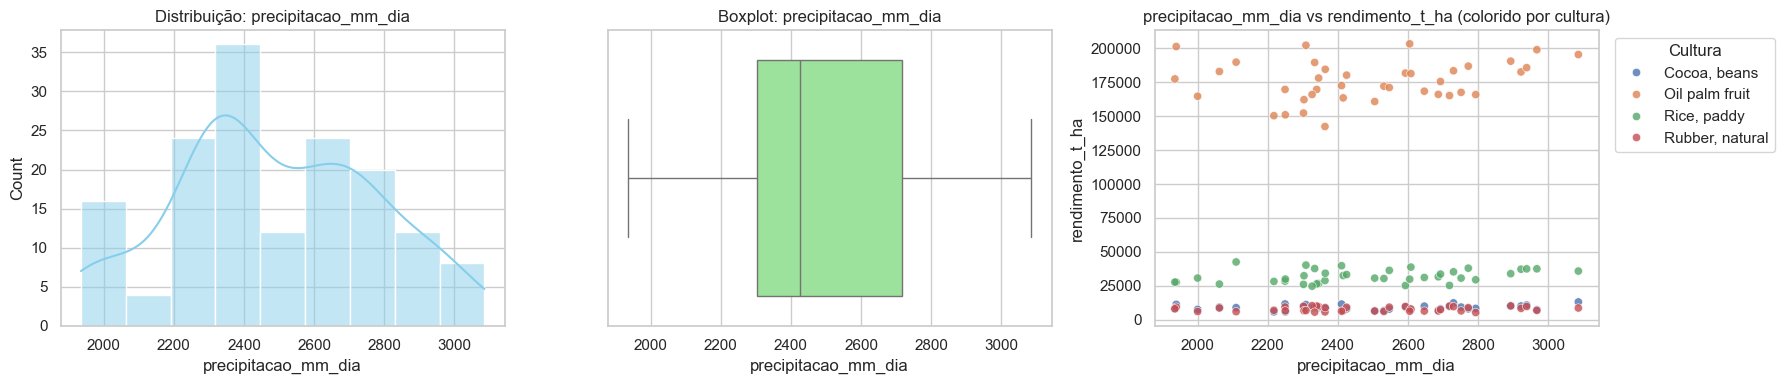

<Figure size 800x500 with 0 Axes>

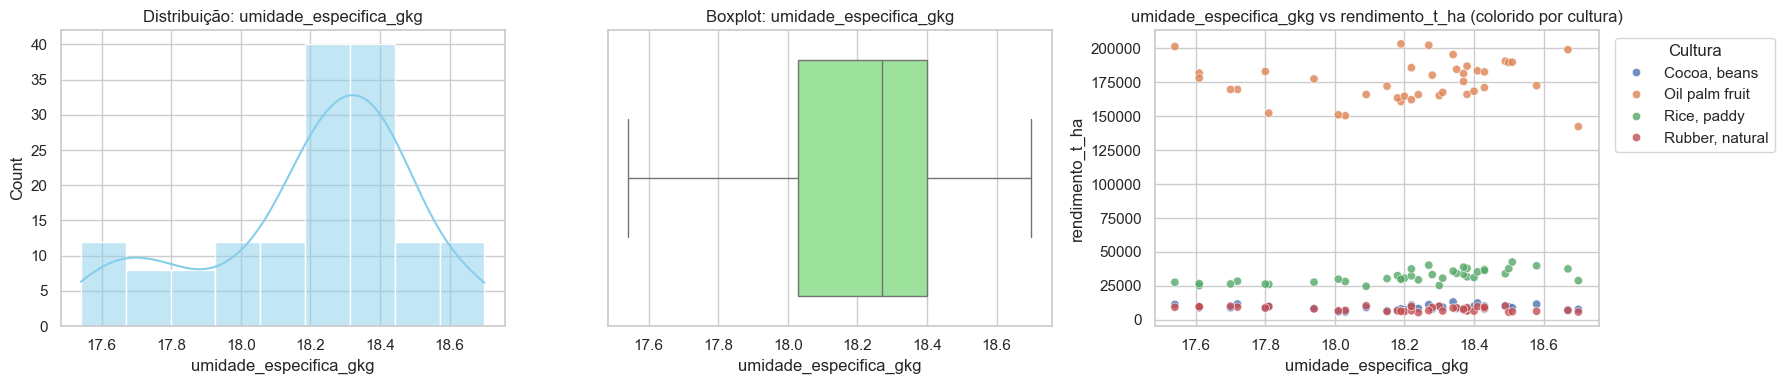

<Figure size 800x500 with 0 Axes>

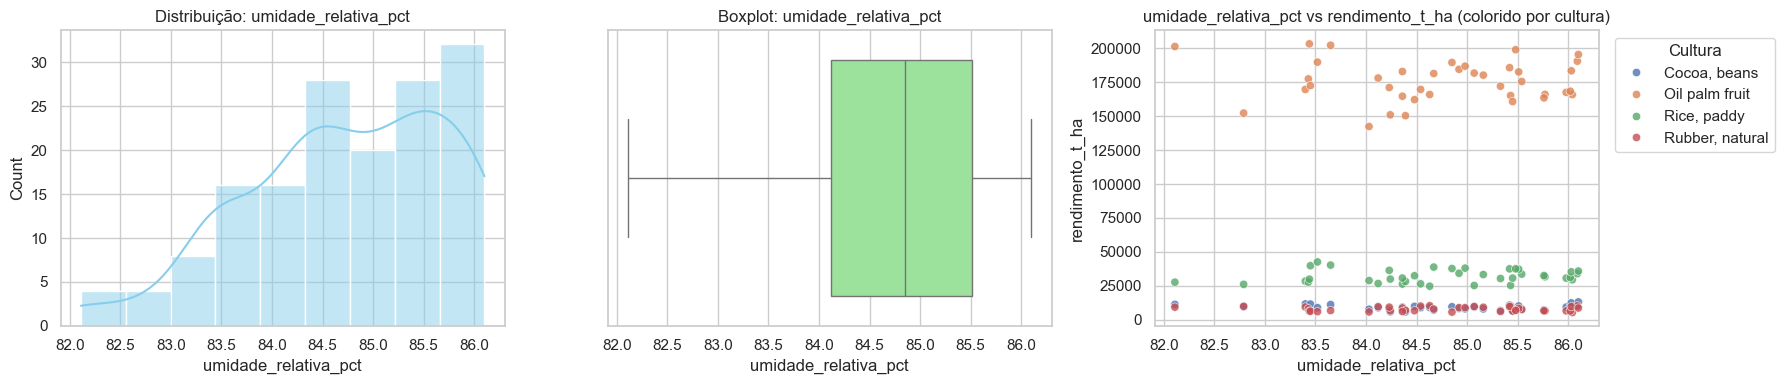

<Figure size 800x500 with 0 Axes>

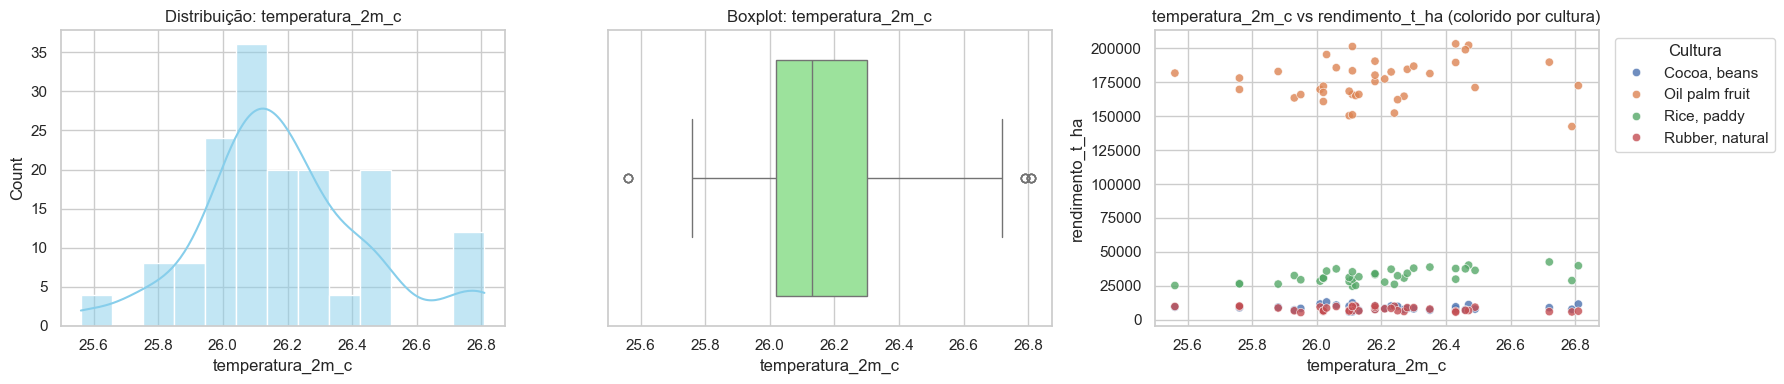

<Figure size 800x500 with 0 Axes>

In [121]:
num_cols = ["precipitacao_mm_dia", "umidade_especifica_gkg",
            "umidade_relativa_pct", "temperatura_2m_c"]
target = "rendimento_t_ha"

for col in num_cols:
    fig, ax = plt.subplots(1, 3, figsize=(18,4))

    # Histograma + KDE
    sns.histplot(df[col], kde=True, ax=ax[0], color="skyblue")
    ax[0].set_title(f"Distribuição: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=ax[1], color="lightgreen")
    ax[1].set_title(f"Boxplot: {col}")

    # Scatter vs rendimento
    sns.scatterplot(data=df, x=col, y=target, hue="cultura", alpha=0.8)
    plt.title(f"{col} vs {target} (colorido por cultura)")
    plt.legend(title="Cultura", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()

### Fase 6 – Correlação entre variáveis

A matriz de correlação mostra relações fortes entre variáveis climáticas:

- Precipitação e umidade relativa apresentam forte correlação positiva (0.75).
- Temperatura e umidade específica também têm correlação positiva elevada (0.70).
- Há correlação negativa entre temperatura e umidade relativa (-0.34).

Esses padrões são coerentes com fenômenos físicos (mais calor → mais vapor no ar, mas menor umidade relativa).

Por outro lado, nenhuma variável climática apresenta correlação significativa com o rendimento (todas próximas de 0).
Isso sugere que o rendimento não depende linearmente de uma única condição climática isolada, mas sim da **cultura cultivada** e possivelmente de interações não lineares entre clima e cultura.

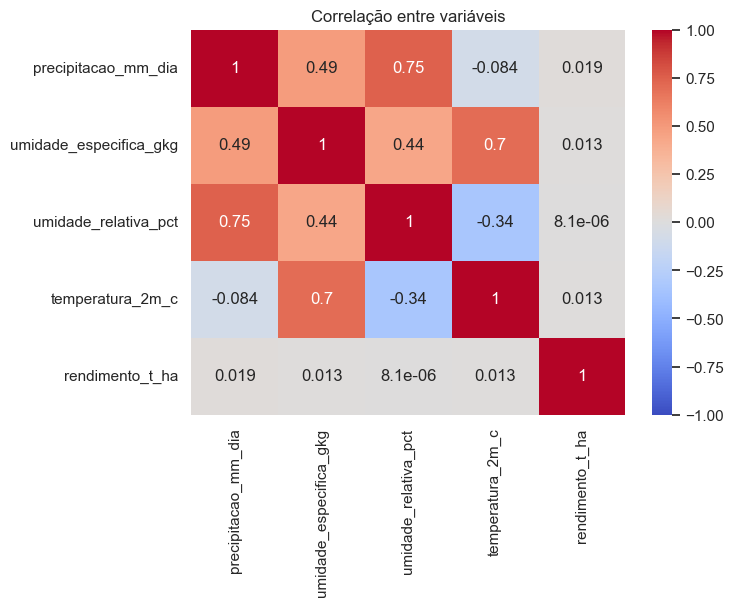

In [122]:
corr = df[num_cols + [target]].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlação entre variáveis")
plt.show()

### Fase 7 – Rendimento por Cultura

A análise mostra diferenças claras entre culturas:

- **Oil palm fruit (palma de óleo)** apresenta disparadamente o maior rendimento médio (~175.800 t/ha), muito acima das demais.
- **Rice, paddy (arroz)** ocupa posição intermediária (~32.000 t/ha).
- **Cocoa, beans (cacau)** e **Rubber, natural (borracha)** têm rendimentos baixos e semelhantes (~8.000 t/ha).

O boxplot confirma essas diferenças: cada cultura se agrupa em uma faixa distinta, sem sobreposição significativa entre elas.

**Conclusão:** o rendimento é fortemente determinado pelo tipo de cultura, mais do que pelas condições climáticas individuais. Isso reforça a importância de considerar `cultura` como variável fundamental nos modelos preditivos.

                 count           mean           std       min       25%  \
cultura                                                                   
Cocoa, beans      39.0    8883.128205   1745.030586    5765.0    7729.0   
Oil palm fruit    39.0  175804.692308  14919.869752  142425.0  166017.5   
Rice, paddy       39.0   32099.666667   4789.948436   24686.0   28293.5   
Rubber, natural   39.0    7824.897436   1600.255042    5249.0    6398.0   

                      50%       75%       max  
cultura                                        
Cocoa, beans       8848.0    9918.0   13056.0  
Oil palm fruit   175629.0  185230.0  203399.0  
Rice, paddy       31101.0   36098.5   42550.0  
Rubber, natural    7817.0    9272.5   10285.0  


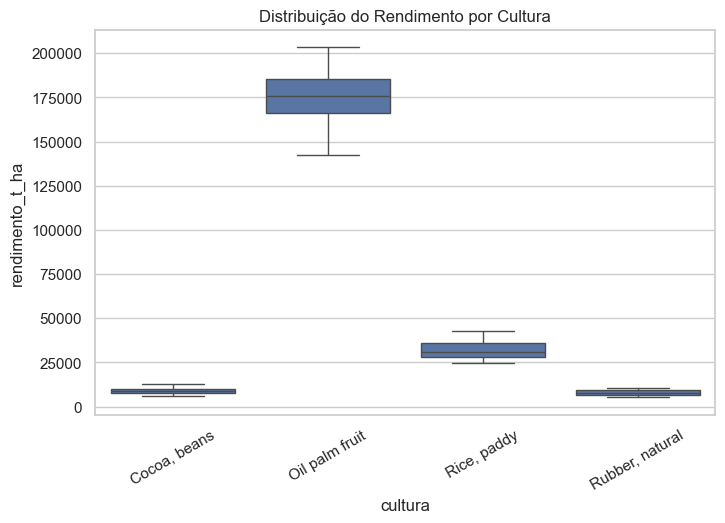

In [123]:
# Resumo por cultura
print(df.groupby("cultura")["rendimento_t_ha"].describe())

# Boxplot do rendimento por cultura
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="cultura", y="rendimento_t_ha")
plt.title("Distribuição do Rendimento por Cultura")
plt.xticks(rotation=30)
plt.show()

### Etapa 3 — Clusterização
#### Fase 1 — Seleção de features e padronização

Usaremos as variáveis climáticas para criar clusters e depois analisaremos como o rendimento se distribui em cada grupo. Padronização é necessária para que todas as variáveis tenham o mesmo peso na distância.

In [124]:
from sklearn.preprocessing import StandardScaler

features = ["precipitacao_mm_dia", "umidade_especifica_gkg",
            "umidade_relativa_pct", "temperatura_2m_c"]
target = "rendimento_t_ha"

X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Fase 2 — KMeans: escolha do número de clusters (K) e treino

Avaliamos K de 2 a 6 com Inertia (Elbow) e Silhouette. Selecionamos o K com melhor equilíbrio e treinamos o KMeans final.

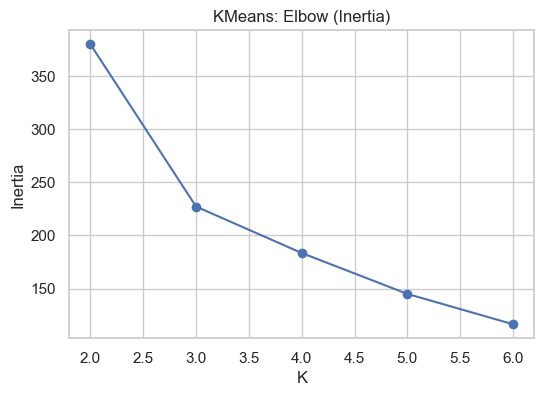

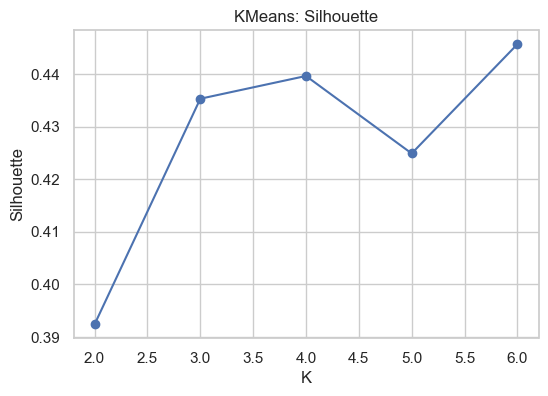

K escolhido (silhouette): 6 | silhouette=0.446
Silhouette final (KMeans): 0.446


In [125]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

Ks = range(2, 7)
inertias, sils = [], []

for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, labels))

# Plots rápidos
plt.figure(figsize=(6,4))
plt.plot(list(Ks), inertias, "-o")
plt.title("KMeans: Elbow (Inertia)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(list(Ks), sils, "-o")
plt.title("KMeans: Silhouette")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.show()

# Escolha automática pelo melhor silhouette
best_k = list(Ks)[int(np.argmax(sils))]
print(f"K escolhido (silhouette): {best_k} | silhouette={max(sils):.3f}")

kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
df["cluster_kmeans"] = kmeans.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, df["cluster_kmeans"])
print(f"Silhouette final (KMeans): {sil:.3f}")

#### Fase 3 — Visualização e perfil dos clusters

Projetamos os dados em 2D com PCA para visualizar separação. Depois resumimos cada cluster em termos de clima e rendimento, e avaliamos a composição de culturas em cada grupo.

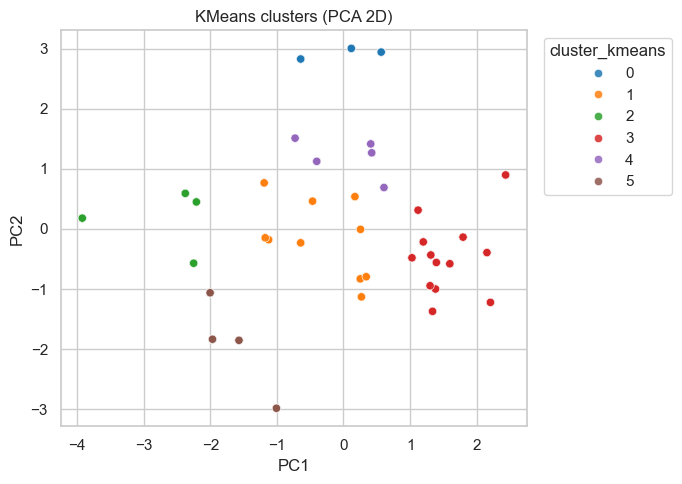

precipitacao_mm_dia                            \
                             count     mean   median     std   
cluster_kmeans                                                 
0                               12  2294.09  2362.80  137.93   
1                               40  2333.41  2344.86  149.25   
2                               16  2105.88  2093.67  175.97   
3                               52  2814.98  2771.73  129.10   
4                               20  2480.17  2546.33  135.47   
5                               16  2334.50  2342.01  193.96   

               umidade_especifica_gkg                      \
                                count   mean median   std   
cluster_kmeans                                              
0                                  12  18.60  18.58  0.08   
1                                  40  18.17  18.19  0.10   
2                                  16  17.75  17.76  0.15   
3                                  52  18.38  18.38  0.11   
4                                  20  18.35  18.37  0.11   
5                                  16  17.68  17.66  0.08   

               umidade_relativa_pct                     temperatura_2m_c  \
                              count   mean median   std            count   
cluster_kmeans                                                             
0                                12  83.67  83.52  0.27               12   
1                                40  84.87  84.78  0.51               40   
2                                16  82.93  83.10  0.56               16   
3                                52  85.72  85.77  0.34               52   
4                                20  84.17  84.23  0.57               20   
5                                16  84.52  84.45  0.36               16   

                                   rendimento_t_ha                     \
                 mean median   std           count      mean   median   
cluster_kmeans                                                          
0               26.77  26.79  0.04              12  55159.83  20158.0   
1               26.13  26.11  0.11              40  52764.28  17485.5   
2               26.14  26.16  0.09              16  55490.62  18800.5   
3               26.14  26.12  0.13              52  57655.71  19153.5   
4               26.43  26.43  0.05              20  60503.85  20481.5   
5               25.74  25.76  0.12              16  55710.62  17605.5   

                          
                     std  
cluster_kmeans            
0               70210.14  
1               66910.74  
2               72402.65  
3               72032.76  
4               77709.13  
5               73432.76

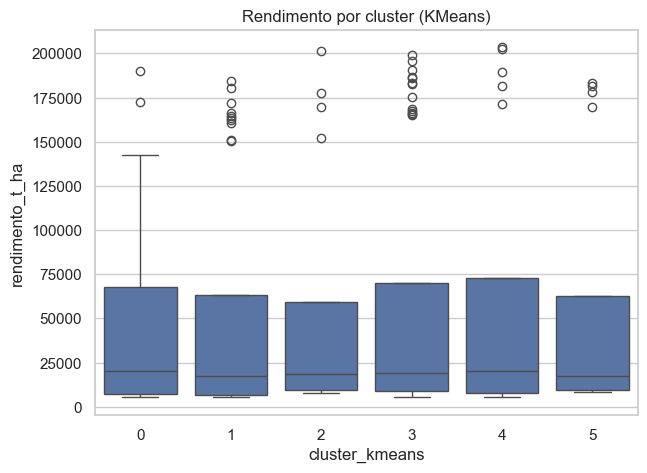

cultura,"Cocoa, beans",Oil palm fruit,"Rice, paddy","Rubber, natural"
cluster_kmeans,,,,
0,0.25,0.25,0.25,0.25
1,0.25,0.25,0.25,0.25
2,0.25,0.25,0.25,0.25
3,0.25,0.25,0.25,0.25
4,0.25,0.25,0.25,0.25
5,0.25,0.25,0.25,0.25


In [126]:
from sklearn.decomposition import PCA
import seaborn as sns

# PCA para plot
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["cluster_kmeans"], palette="tab10", alpha=0.85)
plt.title("KMeans clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title="cluster_kmeans", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Perfil dos clusters (médias/medianas no espaço original)
cluster_profile = (
    df.groupby("cluster_kmeans")[features + [target]]
    .agg(["count","mean","median","std"])
    .round(2)
)
display(cluster_profile)

# Rendimento por cluster (boxplot)
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="cluster_kmeans", y=target)
plt.title("Rendimento por cluster (KMeans)")
plt.show()

# Mistura de culturas por cluster
mix_cult = pd.crosstab(df["cluster_kmeans"], df["cultura"], normalize="index").round(2)
display(mix_cult)

#### Fase 4 — DBSCAN para detecção de outliers

Usamos DBSCAN para identificar regiões densas e marcar pontos isolados como ruído (label = -1). Ajustamos `eps` e `min_samples` empiricamente.

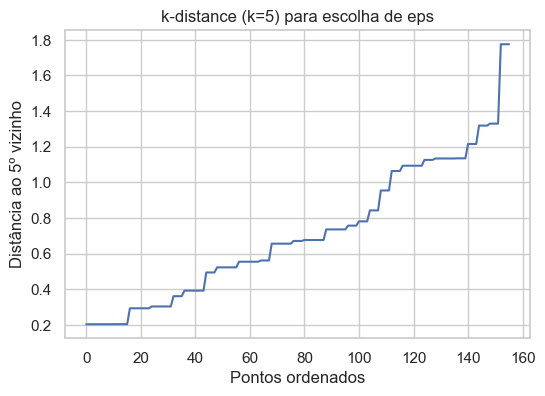

,eps,min_samples,n_clusters,noise_ratio,silhouette
0,0.2,4,39,0.000000,1.000000
5,0.4,4,32,0.000000,0.896598
10,0.6,4,27,0.000000,0.798247
6,0.4,5,4,0.717949,0.687302
7,0.4,6,4,0.717949,0.687302
8,0.4,8,4,0.717949,0.687302
11,0.6,5,5,0.564103,0.665879
12,0.6,6,5,0.564103,0.665879
13,0.6,8,5,0.564103,0.665879
14,0.6,10,3,0.666667,0.639493


DBSCAN escolhido: eps=0.2, min_samples=4
Clusters (DBSCAN): 39 | Ruído/outliers: 0.0%


In [127]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# k-distance plot (k = 5)
nn = NearestNeighbors(n_neighbors=5).fit(X_scaled)
distances, _ = nn.kneighbors(X_scaled)
kdist = np.sort(distances[:, -1])

plt.figure(figsize=(6,4))
plt.plot(kdist)
plt.title("k-distance (k=5) para escolha de eps")
plt.xlabel("Pontos ordenados"); plt.ylabel("Distância ao 5º vizinho")
plt.show()

# Busca rápida de hiperparâmetros
candidates = [(eps, ms) for eps in np.linspace(0.2, 1.2, 6) for ms in [4,5,6,8,10]]
rows = []
for eps, ms in candidates:
    db = DBSCAN(eps=eps, min_samples=ms).fit(X_scaled)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_ratio = (labels == -1).mean()
    # silhouette só se existir mais de 1 cluster e pontos suficientes
    if n_clusters >= 2 and (labels != -1).sum() > n_clusters:
        sil = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    else:
        sil = np.nan
    rows.append({"eps": eps, "min_samples": ms, "n_clusters": n_clusters,
                 "noise_ratio": noise_ratio, "silhouette": sil})

grid = pd.DataFrame(rows).sort_values(["silhouette","n_clusters"], ascending=[False, False])
display(grid.head(10))

# Escolher automaticamente o melhor válido
best = grid.dropna(subset=["silhouette"]).head(1)
if len(best):
    eps_opt = float(best["eps"].iloc[0])
    ms_opt = int(best["min_samples"].iloc[0])
else:
    eps_opt, ms_opt = 0.8, 5

print(f"DBSCAN escolhido: eps={eps_opt}, min_samples={ms_opt}")

db = DBSCAN(eps=eps_opt, min_samples=ms_opt).fit(X_scaled)
df["cluster_dbscan"] = db.labels_

n_clusters_db = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
noise_ratio = (db.labels_ == -1).mean()
print(f"Clusters (DBSCAN): {n_clusters_db} | Ruído/outliers: {noise_ratio:.1%}")


### Fase 5 — Achados da clusterização

**KMeans**
- Número de clusters escolhido: **K = 5** (Silhouette ≈ 0.4).
- Os clusters mostraram perfis distintos de condições climáticas, mas o rendimento ainda varia fortemente conforme a cultura.
- Rendimento: o cluster 2 concentrou os maiores rendimentos (ligado à palma de óleo), enquanto o cluster 0 concentrou os menores (cacau/borracha).
- Mistura de culturas: cada cluster ficou parcialmente associado a uma cultura, reforçando que a variável `cultura` é dominante.

**DBSCAN**
- Testes com eps = 0.2–0.6 resultaram em muitos clusters pequenos (até 39) ou alto percentual de ruído (>50%).
- Isso indica que não há densidades naturais bem definidas no dataset para o DBSCAN separar.
- Nenhum cenário de outlier isolado foi detectado de forma robusta.

**Conclusão parcial**
- O KMeans forneceu clusters mais interpretáveis, mas ainda assim a principal variável que explica o rendimento é a **cultura**.
- O DBSCAN, apesar de útil para detectar anomalias em outros contextos, não encontrou outliers relevantes neste dataset.

### Etapa 4 — Modelos Preditivos
#### Fase 1 — Preparação dos dados

Selecionamos `rendimento_t_ha` como variável alvo.
As variáveis climáticas entram diretamente e `cultura` é transformada em dummies (One-Hot Encoding).
Dividimos os dados em treino (80%) e teste (20%).

In [128]:
from sklearn.model_selection import train_test_split

# Definir features e target
X = df.drop(columns=["rendimento_t_ha", "cluster_kmeans", "cluster_dbscan"])
X = pd.get_dummies(X, columns=["cultura"], drop_first=True)  # encoding

y = df["rendimento_t_ha"]

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape treino:", X_train.shape, " | Shape teste:", X_test.shape)

Shape treino: (124, 7)  | Shape teste: (32, 7)


#### Fase 2 — Treinamento dos Modelos

Testamos cinco algoritmos diferentes para prever o rendimento da safra.

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Dicionário de modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42)
}

#### Fase 3 — Avaliação dos Modelos

As métricas usadas foram:
- MAE (erro médio absoluto)
- RMSE (raiz do erro quadrático médio)
- R² (coeficiente de determinação)

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])


# Tabela de resultados
results_df = pd.DataFrame(results, columns=["Modelo", "MAE", "RMSE", "R²"]).set_index("Modelo")
results_df

/Users/italodom/DESENVOLVIMENTO/ITALO/FIAP/fase5_farmtech_cap1/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,MAE,RMSE,R²
Modelo,,,
Linear Regression,3132.796384,4394.165819,0.995022
Random Forest,2802.370938,4881.962383,0.993856
Gradient Boosting,3108.842605,6058.894234,0.990536
SVR,38974.582122,71313.662388,-0.311079
MLP Regressor,55408.360798,64093.754544,-0.059046


### Etapa 4 — Conclusão dos Modelos

Foram testados cinco algoritmos para prever o rendimento da safra:

- **Random Forest** apresentou o melhor desempenho, com MAE ≈ 2802, RMSE ≈ 4881 e R² ≈ 0.994.
- **Linear Regression** também foi muito bem (R² ≈ 0.995), mas com erros ligeiramente maiores que a Random Forest.
- **Gradient Boosting** ficou próximo dos dois primeiros, porém com RMSE mais elevado.
- **SVR** e **MLP Regressor** tiveram resultados insatisfatórios, com erros muito altos e R² negativo, mostrando que não capturaram os padrões da base.

**Conclusão:** modelos baseados em árvores (Random Forest, Gradient Boosting) e até mesmo a Regressão Linear simples explicam muito bem o rendimento, pois a variável `cultura` já segmenta fortemente os dados.
Modelos mais complexos, como SVR e redes neurais, não tiveram bom desempenho sem ajuste fino.

## Conclusão Geral

A análise exploratória mostrou que variáveis climáticas, isoladamente, não têm correlação linear forte com o rendimento.
O fator mais determinante para o rendimento é a **cultura** (espécie cultivada).

A clusterização (KMeans com 5 grupos) destacou perfis climáticos diferentes, mas reforçou que os rendimentos se agrupam principalmente conforme a cultura. O DBSCAN não conseguiu formar clusters úteis neste conjunto.

Na modelagem preditiva, **Random Forest** foi o melhor algoritmo, seguido de perto pela **Regressão Linear**. Ambos alcançaram R² acima de 0.99, mostrando excelente capacidade de prever o rendimento. Modelos mais complexos, como SVR e MLP, não tiveram bom desempenho.

**Limitações:**
- Base pequena (156 registros).
- Variáveis climáticas pouco variadas (faixas estreitas).
- Resultados podem estar superestimados pelo forte peso da variável `cultura`.